# 1. Data for Assignment 2

### 1.1. Download and load datasets

In [0]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download all three Microsoft BotBuilder Personality Chat Datasets on Google Colab virtual server

id = '1SXoGbD9WZHwhpqR-cBw7-8_7Ri06nIb6'
downloaded = drive.CreateFile({'id':id }) 
downloaded.GetContentFile('WikiQA-train.tsv') 

id = '1TwuDSxlcAFDnTRpF-GRvqRXoR_UsJznH'
downloaded = drive.CreateFile({'id':id }) 
downloaded.GetContentFile('WikiQA-test.tsv') 

In [1]:
import pandas as pd

# train.tsv
df_train=pd.read_csv('WikiQA-train.tsv', sep='\t',quoting=3)
df_train.head(5)

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,Q1,how are glacier caves formed?,D1,Glacier cave,D1-0,A partly submerged glacier cave on Perito More...,0
1,Q1,how are glacier caves formed?,D1,Glacier cave,D1-1,The ice facade is approximately 60 m high,0
2,Q1,how are glacier caves formed?,D1,Glacier cave,D1-2,Ice formations in the Titlis glacier cave,0
3,Q1,how are glacier caves formed?,D1,Glacier cave,D1-3,A glacier cave is a cave formed within the ice...,1
4,Q1,how are glacier caves formed?,D1,Glacier cave,D1-4,"Glacier caves are often called ice caves , but...",0


In [2]:
# test.tsv
df_test=pd.read_csv('WikiQA-test.tsv', sep='\t',quoting=3)
df_test.head(5)

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-0,African immigration to the United States refer...,0
1,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-1,The term African in the scope of this article ...,0
2,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-2,From the Immigration and Nationality Act of 19...,0
3,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-3,African immigrants in the United States come f...,0
4,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-4,"They include people from different national, l...",0


## 1.2. Data Wrangling:

In [3]:
train_dataset = []
test_dataset = []

import nltk
nltk.download('punkt')
from nltk import word_tokenize
def construct_dataset(df):
  dataset = []
  length = 0
  max_length = 0
  current_did = df.iloc[0]['DocumentID']
  instance = {}
  instance['document'] = []
  instance['query'] = []
  #answer is the index of the answer sentence in the document
  #max sentence number = 30, 
  #set index == 30 so only no answer question will have sentence index == 30
  instance['answer'] = 30 
  instance['doc_text'] = ''
  instance['sentences'] = []
  instance['sentences_token'] = []

  query_saved = False
  for index,row in df.iterrows():
    if row['DocumentID'] != current_did:
      current_did = row['DocumentID']
      # currently we save the questions that have no answer as an empty array
      # maybe we can add taggings like NONE etc..
      if(length>max_length): max_length = length
      instance['doc_text'] = instance['doc_text'][1:]
      dataset.append(instance)
      
      instance = {}
      instance['document'] = []
      instance['query'] = []
      instance['answer'] = 30
      instance['doc_text'] = ''
      instance['sentences'] = []
      instance['sentences_token'] = []
      length = 0
      query_saved = False
      
    sent_tokens = word_tokenize(row['Sentence'])
    if not query_saved:
      instance['query'] = word_tokenize(row['Question'])
      query_saved = True
    if(row['Label']==1): 
      instance['answer'] = length
    instance['document'] += sent_tokens
    instance['doc_text'] = ' '.join([instance['doc_text'],row['Sentence']])
    instance['sentences_token'].append(sent_tokens)
    instance['sentences'].append(row['Sentence'])
    length += 1
  
  if(length>max_length): max_length = length
  instance['doc_text'] = instance['doc_text'][1:]
  dataset.append(instance)
  return dataset,max_length

train_dataset,train_max_sent_num = construct_dataset(df_train)
test_dataset, test_max_sent_num = construct_dataset(df_test)
#max_sent_num plus one, so the last one represents no answer
max_sent_num = max(train_max_sent_num,test_max_sent_num)+1
print(len(train_dataset))
print(len(test_dataset))
print(max_sent_num)
train_dataset[0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
2118
633
31


{'answer': 3,
 'doc_text': 'A partly submerged glacier cave on Perito Moreno Glacier . The ice facade is approximately 60 m high Ice formations in the Titlis glacier cave A glacier cave is a cave formed within the ice of a glacier . Glacier caves are often called ice caves , but this term is properly used to describe bedrock caves that contain year-round ice.',
 'document': ['A',
  'partly',
  'submerged',
  'glacier',
  'cave',
  'on',
  'Perito',
  'Moreno',
  'Glacier',
  '.',
  'The',
  'ice',
  'facade',
  'is',
  'approximately',
  '60',
  'm',
  'high',
  'Ice',
  'formations',
  'in',
  'the',
  'Titlis',
  'glacier',
  'cave',
  'A',
  'glacier',
  'cave',
  'is',
  'a',
  'cave',
  'formed',
  'within',
  'the',
  'ice',
  'of',
  'a',
  'glacier',
  '.',
  'Glacier',
  'caves',
  'are',
  'often',
  'called',
  'ice',
  'caves',
  ',',
  'but',
  'this',
  'term',
  'is',
  'properly',
  'used',
  'to',
  'describe',
  'bedrock',
  'caves',
  'that',
  'contain',
  'year-rou

### Document Length Distribution (Visulization cells can skip)

Text(0, 0.5, 'Length')

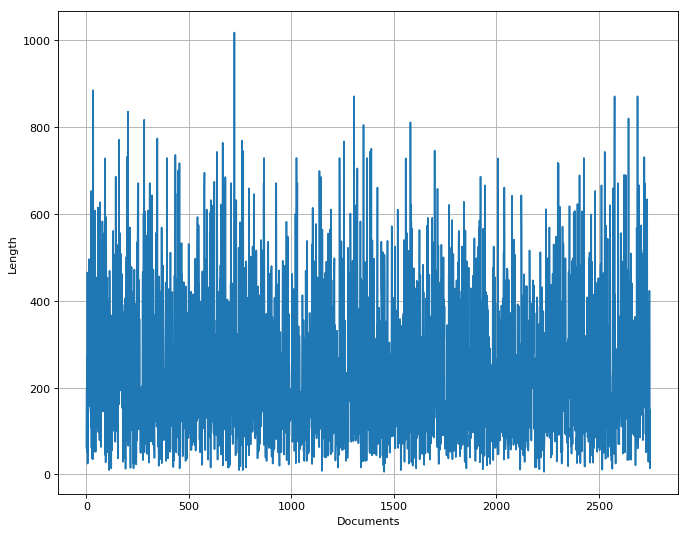

In [154]:
l = []
for instance in train_dataset+test_dataset:
  l.append(len(instance['document']))
#print(l)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.grid(True)
plt.plot(l)
plt.xlabel('Documents')
plt.ylabel('Length')

**Count document numbers at different length range**

In [0]:
doc_num_in_lenghts = {k:0 for k in range(100,1200,100)}
last_d = 0
for d in doc_num_in_lenghts:
  num = []
  for i in l:
    if i<d: num+=[i]
  doc_num_in_lenghts[d] = len(num)-last_d
  last_d = len(num)
for d,n in doc_num_in_lenghts.items():
  print("length:",d,"num of dic:",n)

length: 100 num of dic: 584
length: 200 num of dic: 752
length: 300 num of dic: 537
length: 400 num of dic: 400
length: 500 num of dic: 251
length: 600 num of dic: 121
length: 700 num of dic: 68
length: 800 num of dic: 28
length: 900 num of dic: 9
length: 1000 num of dic: 0
length: 1100 num of dic: 1


### Remove documents that exceeds defined max length (if do not want to remove any documents can skip this cell)

In [0]:
def remove_long_doc(dataset,max_length):
  removed = []
  for instance in dataset:
    if(len(instance['document'])<max_length):
      removed.append(instance)
  return removed
max_length = 400
train_dataset = remove_long_doc(train_dataset,max_length)
test_dataset = remove_long_doc(test_dataset,max_length)

### Vectorize the document and question data

In [4]:
vocab = set()
for instance in train_dataset + test_dataset:
    # '|' means OR, in set: set a | set b, means elements from set a and set b
    vocab |= set(instance['document']+instance['query'])
    #print(vocab)
vocab = sorted(vocab)
print(len(vocab))
word_idx = dict((c, i + 1) for i, c in enumerate(vocab))

46757


In [5]:
# Reserve 0 for masking via pad_sequences
vocab_size = len(vocab) + 1
doc_maxlen = max(map(len, (instance['document'] for instance in train_dataset + test_dataset)))
query_maxlen = max(map(len, (instance['query'] for instance in train_dataset + test_dataset)))
print(doc_maxlen,query_maxlen)

1018 23


In [6]:
from keras.preprocessing.sequence import pad_sequences
import copy
import numpy as np
def vectorize_stories(data):
    inputs, queries, answer = [], [], []
    for instance in data:
        inputs.append([word_idx[w] for w in instance['document']])
        queries.append([word_idx[w] for w in instance['query']])
        answer.append(instance['answer'])
    return (pad_sequences(inputs, maxlen=doc_maxlen,padding='post'),
            pad_sequences(queries, maxlen=query_maxlen,padding='post'),
            np.array(answer))

train_copy = copy.deepcopy(train_dataset)
test_copy = copy.deepcopy(test_dataset)
inputs_train, queries_train, answer_train = vectorize_stories(train_copy)
inputs_test, queries_test, answer_test = vectorize_stories(test_copy)
inputs_train[:2]

Using TensorFlow backend.


array([[ 2821, 37084, 43047, ...,     0,     0,     0],
       [10563, 37589,   139, ...,     0,     0,     0]], dtype=int32)

# 2. QA Framework Implementation

## 2.1.1. Word Embedding

In [7]:
import gensim.downloader as api 

info = api.info()  # show info about available models/datasets 
glove_model = api.load("glove-wiki-gigaword-100") 

[==================================================] 100.0% 128.1/128.1MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [11]:
glove_model.wv.most_similar('boy')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('girl', 0.9175729155540466),
 ('man', 0.7914870977401733),
 ('kid', 0.7826381921768188),
 ('woman', 0.7720510959625244),
 ('boys', 0.7572498321533203),
 ('child', 0.7529667615890503),
 ('baby', 0.7506729364395142),
 ('mother', 0.7454359531402588),
 ('girls', 0.7205193042755127),
 ('teenage', 0.7161270976066589)]

In [0]:
from gensim.models import Word2Vec
sentences = [instance['document'] for instance in train_dataset+test_dataset]
sentences += [instance['query'] for instance in train_dataset+test_dataset]
wv_sg_model = Word2Vec(sentences=sentences, size=100, window=5, min_count=0, workers=4, sg=1)

In [10]:
wv_sg_model.wv.most_similar('boy')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('chose', 0.9648311734199524),
 ('interview', 0.9604073762893677),
 ('guy', 0.9594014883041382),
 ('girl', 0.9568846821784973),
 ('dance', 0.9558976888656616),
 ('Stein', 0.9552762508392334),
 ('mistake', 0.9549430012702942),
 ('teenager', 0.9548269510269165),
 ('cult', 0.9548149108886719),
 ('silent', 0.9536294937133789)]

**Get embedding matrix for embedding layer**

In [11]:
# prepare embedding matrix
embedding_matrix = np.zeros((vocab_size, 100))
#np.random.seed(42)
#unknown = np.random.normal(size = 100, scale = 2)
not_in_vocab = 0
for word, i in word_idx.items():
    try:
      # use pre-trained model for better embedding
      embedding_vector = glove_model.wv[word]
    except:
      # use own model for not in vocab words
      embedding_vector = wv_sg_model.wv[word]
      not_in_vocab +=1
print(not_in_vocab)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


21114


## 2.1.2. Feature Extraction

### TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from keras.preprocessing.sequence import pad_sequences

tf = TfidfVectorizer(analyzer='char_wb',max_df=0.5,
                     min_df = 0,tokenizer=nltk.word_tokenize, sublinear_tf=True)
corpus = [instance['doc_text'] for instance in train_dataset+test_dataset]
print(len(corpus))
tf = tf.fit(corpus)

2751


In [13]:
tfidf_input_train = tf.transform([instance['doc_text'] for instance in train_dataset]).todense().tolist()
tfidf_input_train = pad_sequences(tfidf_input_train,maxlen=doc_maxlen,padding='post').reshape(-1,doc_maxlen,1)
tfidf_input_test = tf.transform([instance['doc_text'] for instance in test_dataset]).todense().tolist()
tfidf_input_test = pad_sequences(tfidf_input_test,maxlen=doc_maxlen,padding='post').reshape(-1,doc_maxlen,1)
print(tfidf_input_train.shape,tfidf_input_test.shape)

(2118, 1018, 1) (633, 1018, 1)


### PoS Tagging

In [14]:
import nltk
nltk.download('averaged_perceptron_tagger')
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
def pos_tag_data(dataset):
  pos_tags = []
  for instance in dataset:
    #print("s")
    pos_tag = []
    for sentence in instance['sentences_token']:
      #pos_tag += trained_tagger.tag(sentence)
      pos_tag += nltk.pos_tag(sentence)
    # only extract tags not the word
    pos_tag = [tag[1] for tag in pos_tag]
    pos_tags.append(pos_tag)
  return pos_tags
pos_input_train = pos_tag_data(train_dataset)
pos_input_test = pos_tag_data(test_dataset)

In [0]:
tag_data = [tag for tags in pos_input_train for tag in tags] + [tag for tags in pos_input_test for tag in tags]
pos_tag_list = list(set(tag_data))
pos_tag_dic = {pos:i+1 for i,pos in enumerate(pos_tag_list)}

In [17]:
def pad_pos_data(dataset):
  data = []
  for tag_list in dataset:
    tags = [pos_tag_dic[tag] for tag in tag_list]
    data.append(tags)
  return pad_sequences(data,maxlen=doc_maxlen,padding='post').reshape(-1,doc_maxlen,1)
pos_input_train = pad_pos_data(pos_input_train)
pos_input_test = pad_pos_data(pos_input_test)
print(pos_input_train.shape,pos_input_test.shape)

(2118, 1018, 1) (633, 1018, 1)


### Named Entity tags

In [18]:
!pip install -U spacy
!python -m spacy download en
import en_core_web_sm
import spacy

     |████████████████████████████████| 29.8MB 42.1MB/s 
     |████████████████████████████████| 2.1MB 39.3MB/s 
     |████████████████████████████████| 184kB 44.4MB/s 
     |████████████████████████████████| 3.2MB 39.7MB/s 
  Found existing installation: thinc 6.12.1
    Uninstalling thinc-6.12.1:
      Successfully uninstalled thinc-6.12.1
  Found existing installation: spacy 2.0.18
    Uninstalling spacy-2.0.18:
      Successfully uninstalled spacy-2.0.18
     |████████████████████████████████| 11.1MB 783kB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-y7atir8c/wheels/39/ea/3b/507f7df78be8631a7a3d7090962194cf55bc1158572c0be77f
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.0.0
    Uninstalling en-core-web-sm-2.0.0:
      Successfully uninstalled en-core-web-sm-2.0.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->


In [0]:
nlp = en_core_web_sm.load()

In [0]:
def entity_tag_data(dataset):
  entity_tags = []
  for instance in dataset:
    entity_tag = [x.label_ for x in nlp(instance['doc_text']).ents]
    entity_tags.append(entity_tag)
  return entity_tags
entity_input_train = entity_tag_data(train_dataset)
entity_input_test = entity_tag_data(test_dataset)

In [0]:
entity_data = [tag for tags in entity_input_train for tag in tags] + [tag for tags in entity_input_test for tag in tags]
entity_tag_list = list(set(entity_data))
entity_tag_dic = {pos:i+1 for i,pos in enumerate(entity_tag_list)}
#entity_maxlen = max(map(len, (instance for instance in entity_input_train + entity_input_test)))

In [22]:
#vectorize the name entity tags and pad to 1018
def pad_entity_data(dataset):
  data = []
  for tag_list in dataset:
    entities = [entity_tag_dic[tag] for tag in tag_list]
    data.append(entities)
  return pad_sequences(data,maxlen=doc_maxlen,padding='post').reshape(-1,doc_maxlen,1)
entity_input_train = pad_entity_data(entity_input_train)
entity_input_test = pad_entity_data(entity_input_test)
print(entity_input_train.shape,entity_input_test.shape)

(2118, 1018, 1) (633, 1018, 1)


### Dependency Path

In [23]:
!pip install -U spacy
!python -m spacy download en
import en_core_web_sm
import spacy
from keras.preprocessing.sequence import pad_sequences

Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.1.4)
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [24]:
# extract head ids
def dependency_tag_data(dataset):
  dependency_tags = []
  nlp = spacy.load("en_core_web_sm")
  for instance in dataset:
    dependency_tag = []
    for token in nlp(instance['doc_text']):
      dependency_tag.append(token.head.i+1)
    dependency_tags.append(dependency_tag)
  return pad_sequences(dependency_tags,maxlen=doc_maxlen,padding='post').reshape(-1,doc_maxlen,1)
dependency_input_train = dependency_tag_data(train_dataset)
dependency_input_test = dependency_tag_data(test_dataset)
print(dependency_input_train.shape,dependency_input_test.shape)

(2118, 1018, 1) (633, 1018, 1)


## 2.2 Bi-LSTM Sequence Model (predict sentence id), need to run Section 1 and 2.1 to get the data from the model

In [0]:
from keras.layers import add, dot, concatenate, Dense, Reshape, Flatten, Input, Dropout, RepeatVector
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import Bidirectional
from keras.models import Sequential, Model
from keras.initializers import Constant
import numpy as np

**Select features to construct the model**

In [26]:
features = ['tfidf','pos','entity','dependency']
enabled_features = []
while(True):
  print("What features to use? ['tfidf','pos','entity','dependency']:")
  print("Type one feature or multiple features with comma as separator. i.e: tfidf,pos")
  print("Type 'none' for not using any features")
  enable_features = input()
  if(enable_features=='none'): break
  tokens = enable_features.split(',')
  if len(tokens)>0:
    for feature in tokens:
      if feature in features:
        enabled_features.append(feature)
    if len(enabled_features)>0: break
      
enabled_features

What features to use? ['tfidf','pos','entity','dependency']:
Type one feature or multiple features with comma as separator. i.e: tfidf,pos
Type 'none' for not using any features
tfidf,pos,entity,dependency


['tfidf', 'pos', 'entity', 'dependency']

**Construct Sequence Model**

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


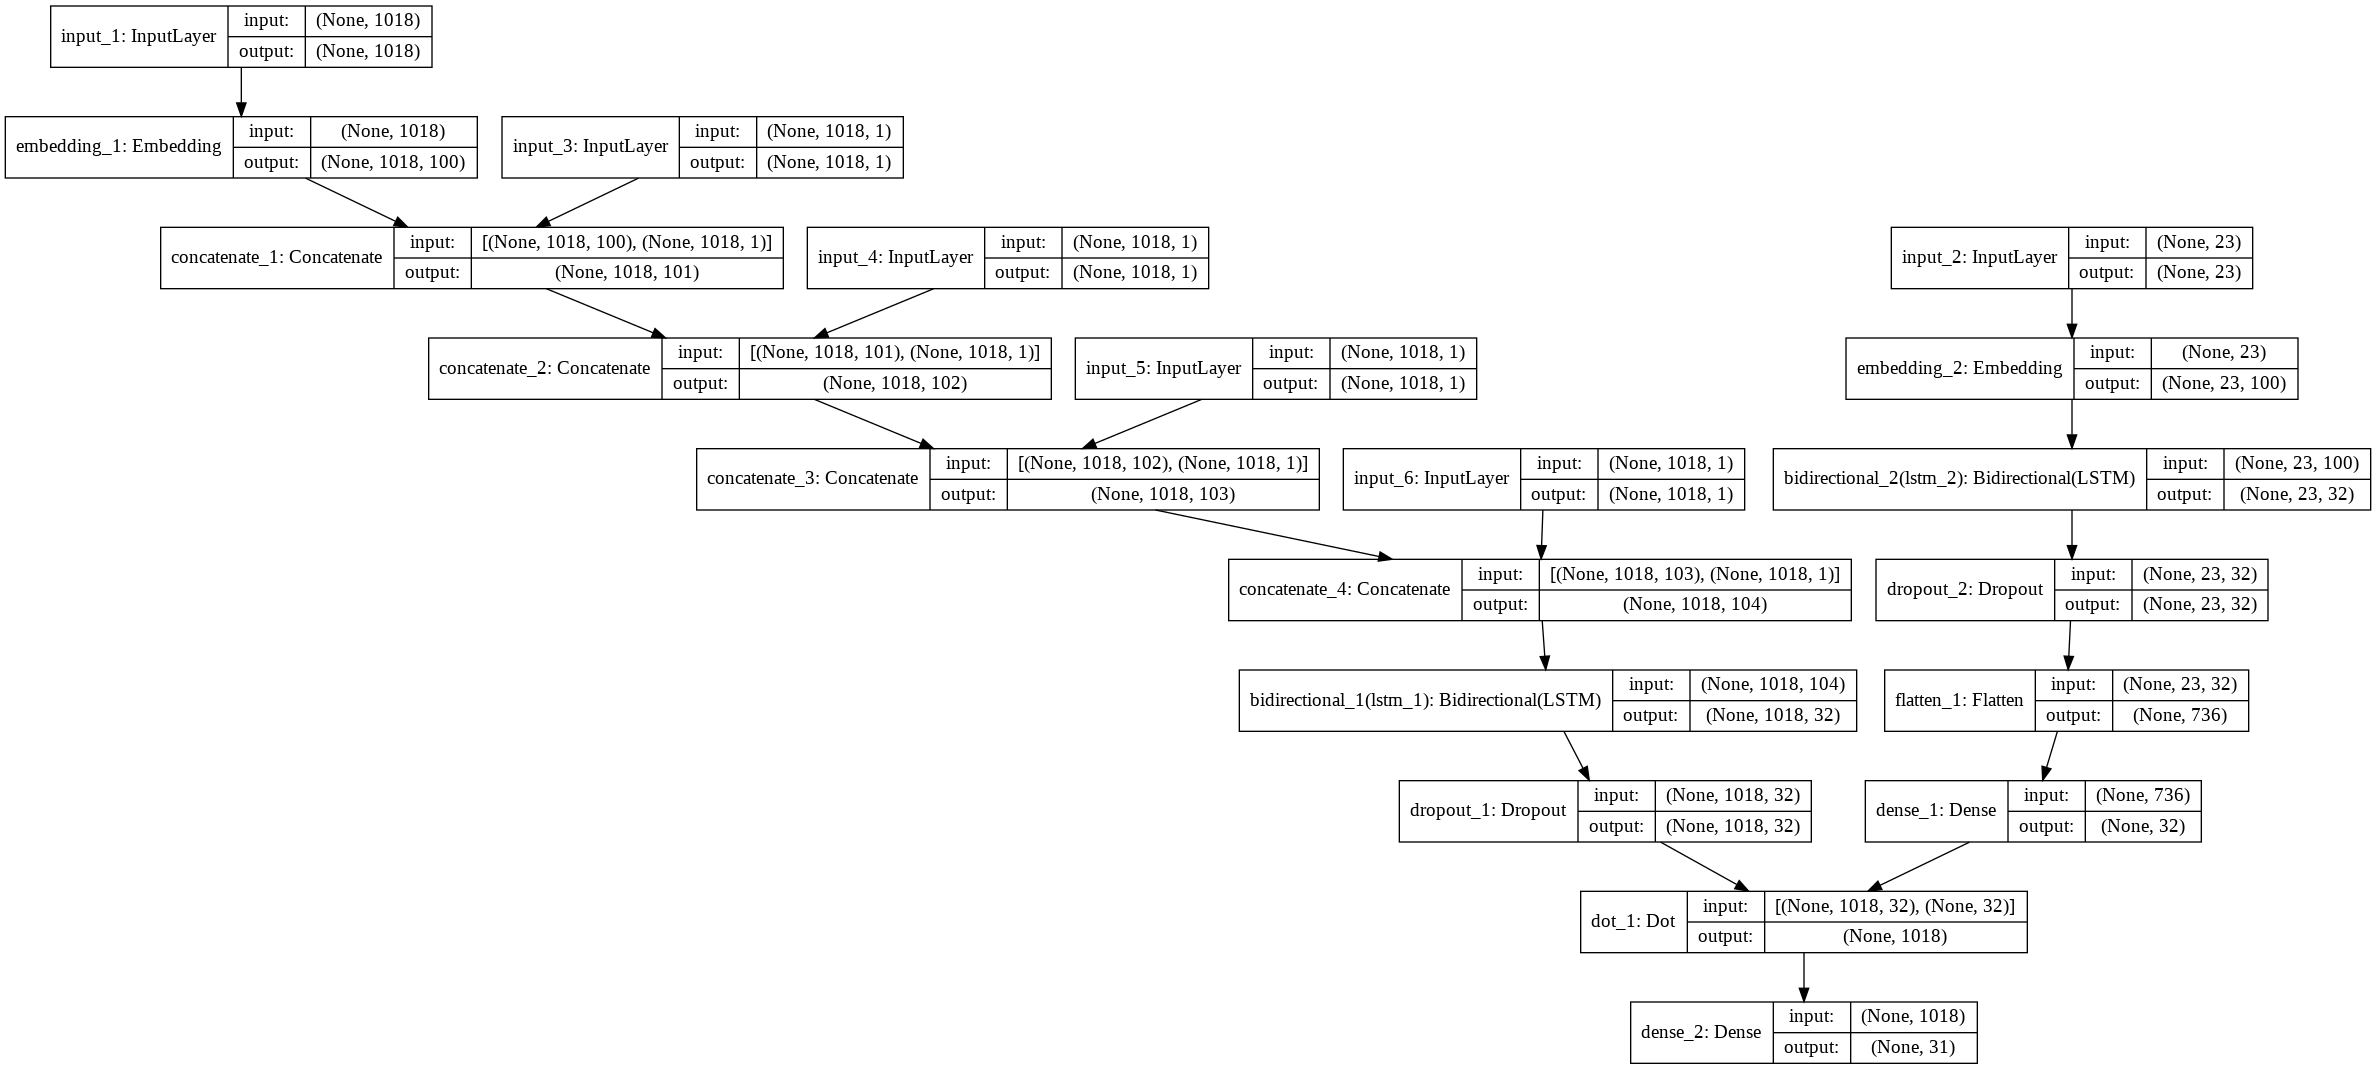

In [27]:
#features = ['tfidf','pos','entity','dependency']
#enabled_features = ['tfidf','pos','entity','dependency']
model_input = []
train_data_input = [inputs_train,queries_train]
test_data_input = [inputs_test,queries_test]
  
word2vec_doc_input = Input((doc_maxlen,))
word2vec_q_input = Input((query_maxlen,))
model_input.append(word2vec_doc_input)
model_input.append(word2vec_q_input)
doc_word2vec_layer = Embedding(vocab_size,
                               output_dim=100,
                               embeddings_initializer=Constant(embedding_matrix),
                               input_length=doc_maxlen,
                               trainable=False)(word2vec_doc_input)
#doc_word2vec_flatten = Flatten()(doc_word2vec_layer)

q_word2vec_layer = Embedding(vocab_size,
                               output_dim=100,
                               embeddings_initializer=Constant(embedding_matrix),
                               input_length=query_maxlen,
                               trainable=False)(word2vec_q_input)
if 'tfidf' in enabled_features:
  tfidf_input = Input((doc_maxlen,1))
  model_input.append(tfidf_input)
  train_data_input.append(tfidf_input_train)
  test_data_input.append(tfidf_input_test)
if 'pos' in enabled_features:
  pos_input = Input((doc_maxlen,1))
  model_input.append(pos_input)
  train_data_input.append(pos_input_train)
  test_data_input.append(pos_input_test)
if 'entity' in enabled_features:
  entity_input = Input((doc_maxlen,1))
  model_input.append(entity_input)
  train_data_input.append(entity_input_train)
  test_data_input.append(entity_input_test)
if 'dependency' in enabled_features:
  dependency_input = Input((doc_maxlen,1))
  model_input.append(dependency_input)
  train_data_input.append(dependency_input_train)
  test_data_input.append(dependency_input_test)

word2vec_plus_features = doc_word2vec_layer
if len(enabled_features)>0:
  if 'tfidf' in enabled_features:
    word2vec_plus_features = concatenate([word2vec_plus_features,tfidf_input])
  if 'pos' in enabled_features:
    word2vec_plus_features = concatenate([word2vec_plus_features,pos_input])
  if 'entity' in enabled_features:
    word2vec_plus_features = concatenate([word2vec_plus_features,entity_input])
  if 'dependency' in enabled_features:
    word2vec_plus_features = concatenate([word2vec_plus_features,dependency_input])

doc_bi_lstm =  Bidirectional(LSTM(32, return_sequences=True), merge_mode="sum")(word2vec_plus_features)
doc_dropout = Dropout(0.3)(doc_bi_lstm)
query_bi_lstm = Bidirectional(LSTM(32, return_sequences=True), merge_mode="sum")(q_word2vec_layer)
query_dropout = Dropout(0.3)(query_bi_lstm)
query_flatten = Flatten()(query_dropout)
query_dense = Dense(32)(query_flatten)

attn = dot([doc_dropout, query_dense], axes=[2, 1])
answer = Dense(max_sent_num, activation="softmax")(attn)
model = Model(model_input, answer)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
    
from keras.utils import plot_model
from IPython.display import display, Image
# plot graph
plot_model(model, to_file='recurrent_neural_network.png', show_shapes=True)
# display graph
display(Image(filename='recurrent_neural_network.png'))

**Train the model**

In [31]:
print("Training...")

model.fit(train_data_input, answer_train, batch_size=32,
          epochs=10, validation_data=(test_data_input, answer_test))

Training...
Train on 2118 samples, validate on 633 samples
Epoch 1/10
2118/2118 [==============================] - 75s 36ms/step - loss: 1.3739 - acc: 0.5855 - val_loss: 1.5272 - val_acc: 0.6066
Epoch 2/10
2118/2118 [==============================] - 76s 36ms/step - loss: 1.3545 - acc: 0.5751 - val_loss: 1.5683 - val_acc: 0.5798
Epoch 3/10
2118/2118 [==============================] - 76s 36ms/step - loss: 1.2920 - acc: 0.5907 - val_loss: 1.5817 - val_acc: 0.5861
Epoch 4/10
2118/2118 [==============================] - 76s 36ms/step - loss: 1.2924 - acc: 0.5859 - val_loss: 1.6350 - val_acc: 0.5750
Epoch 5/10
2118/2118 [==============================] - 76s 36ms/step - loss: 1.2421 - acc: 0.5982 - val_loss: 1.6350 - val_acc: 0.5877
Epoch 6/10
2118/2118 [==============================] - 76s 36ms/step - loss: 1.1964 - acc: 0.6020 - val_loss: 1.6265 - val_acc: 0.5972
Epoch 7/10
2118/2118 [==============================] - 76s 36ms/step - loss: 1.1648 - acc: 0.6034 - val_loss: 1.7067 - val_a

In [93]:
print("Evaluating...")
loss,accuracy = model.evaluate(test_data_input, answer_test)
print("Loss:",loss,"Accuray:",accuracy)

Evaluating...
2118/2118 [==============================] - 18s 8ms/step
Loss: 1.000990351660281 Accuray: 0.6666666667229506


**Get the actually answer sentence**

In [33]:
predict = model.predict(test_data_input)
predict = np.argmax(predict,axis=1)
for p in range(len(predict)):
  print('Question:',test_dataset[p]['query'])
  if predict[p] == 30: print("Answer: None\n")
  else: print("Answer:",test_dataset[p]['sentences'][predict[p]],'\n')

Question: ['HOW', 'AFRICAN', 'AMERICANS', 'WERE', 'IMMIGRATED', 'TO', 'THE', 'US']
Answer: None

Question: ['how', 'large', 'were', 'early', 'jails']
Answer: None

Question: ['how', 'a', 'water', 'pump', 'works']
Answer: None

Question: ['how', 'old', 'was', 'sue', 'lyon', 'when', 'she', 'made', 'lolita']
Answer: None

Question: ['how', 'are', 'antibodies', 'used', 'in']
Answer: None

Question: ['how', 'old', 'is', 'alicia', 'in', '2009']
Answer: None

Question: ['how', 'big', 'is', 'a', 'land', 'section', 'generally']
Answer: None

Question: ['how', 'old', 'was', 'shakespeare', "'s", 'juliet']
Answer: None

Question: ['how', 'are', 'fire', 'bricks', 'made']
Answer: None

Question: ['HOW', 'MUCH', 'IS', 'CENTAVOS', 'IN', 'MEXICO']
Answer: None

Question: ['How', 'long', 'was', 'Mickie', 'James', 'with', 'WWE', '?']
Answer: None

Question: ['how', 'can', 'something', 'taste', 'good', 'to', 'one', 'person']
Answer: None

Question: ['How', 'did', 'Bob', 'Marley', 'die', '?']
Answer: None


**Save the model**

In [0]:
if len(enabled_features) > 0:
  model_name = "_".join(['model']+enabled_features)+'.h5'
else: model_name = 'model_no_features.h5'
model.save(model_name)

# 2.3 Testing

**Display testing result for the model (need to train a model from previous sections)**

In [142]:
from sklearn.metrics import classification_report

predict = model.predict(test_data_input)
predict = np.argmax(predict,axis=1)
print("===========Test_data==========")
print(classification_report(predict,answer_test))


predict = model.predict(train_data_input)
predict = np.argmax(predict,axis=1)
print("===========Train_data==========")
print(classification_report(predict,answer_train))

===========Test_data==========
              precision    recall  f1-score   support

           0       0.23      0.18      0.20       121
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


===========Train_data==========
              precision    recall  f1-score   support

           0       0.36      0.31      0.33       357
           1       0.05      0.50      0.09        20
           2       0.05      0.56      0.09         9
           3       0.07      0.42      0.12        12
           4       0.02      0.25      0.03         4
           5       0.04      1.00      0.07         1
           6       0.00      0.00      0.00         0
           7       0.12      1.00      0.22         3
           8       0.00      0.00      0.00         0
           9       0.10      1.00      0.18         2
          10       0.00      0.00      0.00         0
          11       0.11      0.50      0.18         2
          12       0.11      1.00      0.20         1
          13       0.14      1.00      0.25         1
          14       0.00      0.00      0.00         0
          15       1.00      1.00      1.00         1
          16       0.00      0.00      0.00      

**Display testing result for trained models (Run Section 1-2.1.2 to obtain inputs for the model before running this cell)**

In [35]:
import os
from keras.models import load_model
from sklearn.metrics import classification_report

models = [filename for filename in os.listdir(".") if filename.startswith('model_')]
#Run Section 1-2.1.2 to obtain inputs for the model before running this cell
feature_input_dict = {
    'tfidf':[tfidf_input_train,tfidf_input_test],
    'pos':[pos_input_train,pos_input_test],
    'entity':[entity_input_train,entity_input_test],
    'dependency':[dependency_input_train,dependency_input_test]
}
train_data_input = [inputs_train,queries_train]
test_data_input = [inputs_test,queries_test]
for current_model in models:
  print("Current model:",current_model)
  seq_model = load_model(current_model)
  print(current_model,"restored.")
  if current_model != 'model_no_features.h5':
    feature_list = current_model[6:-3].split('_')
    for feature in feature_list:
      train_data_input.append(feature_input_dict[feature][0])
      test_data_input.append(feature_input_dict[feature][1])
    
  predict = seq_model.predict(test_data_input)
  predict = np.argmax(predict,axis=1)
  print("===========Test_data==========")
  print(classification_report(predict,answer_test))


  predict = seq_model.predict(train_data_input)
  predict = np.argmax(predict,axis=1)
  print("===========Train_data==========")
  print(classification_report(predict,answer_train))
  
  train_data_input = [inputs_train,queries_train]
  test_data_input = [inputs_test,queries_test]

Current model: model_tfidf_pos_entity_dependency.h5
model_tfidf_pos_entity_dependency.h5 restored.
===========Test_data==========
              precision    recall  f1-score   support

           0       0.02      0.33      0.04         6
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


===========Train_data==========
              precision    recall  f1-score   support

           0       0.01      0.25      0.01         8
           1       0.01      0.25      0.02         8
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00      